### Image Classification with Neural Network

https://victorzhou.com/blog/keras-neural-network-tutorial/

In [4]:
import numpy as np
import mnist #ada data training dan data testing
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [5]:
train_images = mnist.train_images()#sudah di split jadi data training
train_labels = mnist.train_labels()# sudah di split jadi data testing

In [6]:
print(train_images.shape)#melihat ukuran data nanti hasilnya adalah (banyak data yg ada, (ukuran panjang matriks satu gambar dalam satu baris ,ukuran lebar matriks satu gambar dalam satu baris)
print(train_labels.shape)# sehinggaa akan ada 1 baris dengan berisi matriks ukuran 28x28 dgn indeks (0-27), jadi setiap baris di semua 60000 baris itu akan ada data matriks 28x28

(60000, 28, 28)
(60000,)


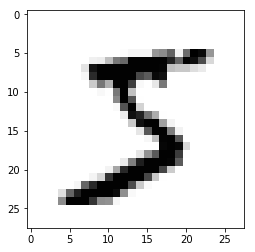

In [9]:
for i in range(1): #kalo dia pake for maka indeks dimulai dari satu
    img = train_images[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show() #coba mencetak satu data pada baris pertama

In [11]:
print(train_labels[0])# karena bukan pake for dia indeksnya dimulai dari 0

5


data training dan testing ini bisa digunakan sebagai pembanding dan untuk mengukur performa pada saat training dan testing. pada training digunakan untuk mengajari dan pada saat data testing digunakan untuk mengukur performanya

In [7]:
print (train_images[0]) #merupakan nilai dari setiap pixel dan 0 merupakan indeks awal dari data yang 6000 tadi 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

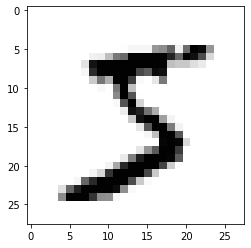

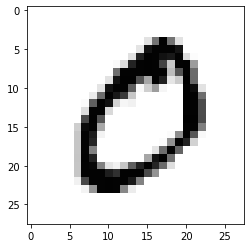

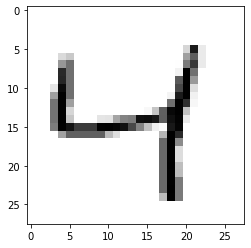

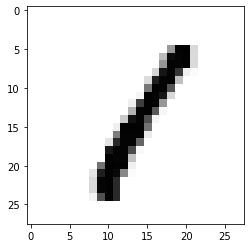

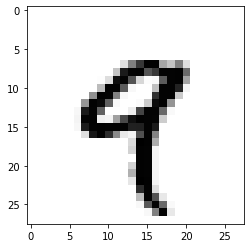

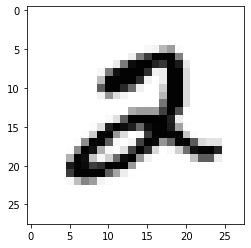

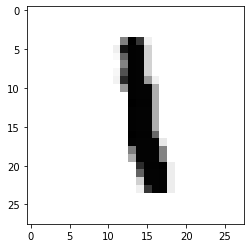

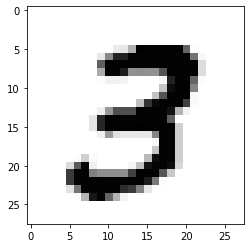

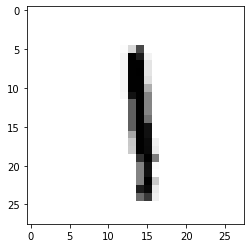

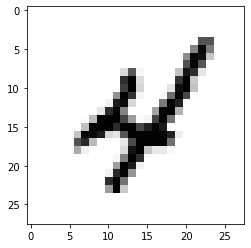

In [8]:
for i in range(10): #mencetak baris 1-10
    img = train_images[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show() # warna putih pada gambar bernilai 0, sedangkan hitam bernilai 255 untuk plot saja

In [12]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()


#### Normalize the images  (merupakan proses preprocessing data)
normalize the pixel values from [0, 255] to [-0.5, 0.5] dengan cara menyempitkan range

In [10]:
train_images = (train_images / 255) - 0.5 
test_images = (test_images / 255) - 0.5

#### Flatten the images
Cara memasukkan gambar dua dimensi ke dalam neural network adalah dengan cara flatten yaitu menjadikan matriks menjadi ukuran satu kolom saja, kolom lainnya digabungkan kedalam kolom pertama

In [11]:
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [15]:
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


#### Building the Model
Membuat model untuk training dan testing

In [13]:
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

#### Compiling the Model

In [19]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

#### Training the Model

In [22]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)


Epoch 1/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.3757 - accuracy: 0.8870
Epoch 2/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.2008 - accuracy: 0.9401
Epoch 3/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.1548 - accuracy: 0.9536
Epoch 4/5
60000/60000 [==============================] - ETA: 0s - loss: 0.1273 - accuracy: 0.96 - 5s 82us/step - loss: 0.1271 - accuracy: 0.9620
Epoch 5/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.1141 - accuracy: 0.9649


#### Testing the Model

In [23]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

10000/10000 [==============================] - 0s 38us/step


[0.1387612047482282, 0.954200029373169]

#### Save the model to disk
 to load the model:
 model.load_weights('model.h5') jika ingin dipakai di kodingan lain

In [24]:
model.save_weights('model1.h5')

##### Predict on the first 5 test images.
untuk memprediksi model yang sudah ada

In [25]:
predictions = model.predict(test_images[:5])

##### Print our model's predictions
untuk print hasil prediksi dari model

In [27]:
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

[7 2 1 0 4]


##### Check our predictions against the ground truths.
untuk mengecek prediksi apakah model tadi sudah pintar apa belum

In [28]:
print(test_labels[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]
